<a href="https://colab.research.google.com/github/fernandeskelvin/titanic-survival-prediction/blob/main/analise_titanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

- 1. Introdução
- 2. Análise Básica dos Dados
- 3. Análise Exploratória dos Dados (EDA)
- 4. Engenharia de Recursos
- 5. Preparando Modelo
- 6. Treinamento de Modelo

## **1. Introdução**

Um dos maiores e mais luxuosos navios de passageiros do seu tempo, o **Titanic** como ficou conhecido, foi construído na Irlanda do Norte a mando da empresa White Star Line, no início do século XX. Embarcou em sua viagem inaugural partindo do porto de Southampton, na Inglaterra, em 10 de abril de 1912, com destino à cidade de Nova Iorque. Entretanto, apenas quatro dias depois, a colisão com um iceberg alterou o curso do Titanic, resultando em seu naufrágio na madrugada de 15 de abril de 1912.

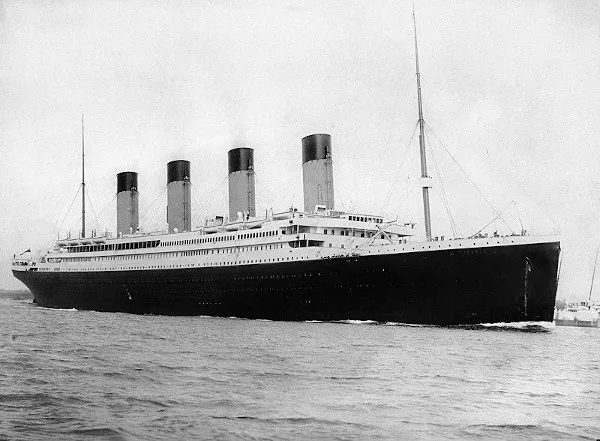

Este estudo busca explorar os fatores que podem ter influenciado na sobrevivência do desastre do Titanic. Para isso, serão analisados os dados dos passageiros que estavam a bordo do navio, a fim de responder a seguinte pergunta: ***Qual perfil de passageiro tem maior probabilidade de sobreviver ao desastre?*** Ao final, construiremos um modelo de aprendizagem de máquina para prever a sobrevivência ao naufrágio.

## **2. Análise Básica dos Dados**

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- `train` - O conjunto de dados "train" possui informações dos passageiros do Titanic para análise exploratória e treino do modelo de aprendizado de máquina.

- `test` - Este conjunto será utilizado para prever a sobrevivência dos passageiros com base nos padrões identificados no treinamento, não incluindo a coluna "survived", que é a variável alvo a ser prevista.

In [2]:
# carregando datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/fernandeskelvin/titanic-survival-prediction/main/dataset/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fernandeskelvin/titanic-survival-prediction/main/dataset/test.csv')

# título de colunas em minúsculo
df_train.columns = [col.lower() for col in df_train.columns]
df_test.columns = [col.lower() for col in df_test.columns]

# combinar os dois datasets
df_combined = [df_train, df_test]

In [3]:
df_test

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**INFORMAÇÕES SOBRE AS COLUNAS**

|Nome Colunas|Significado|
|:---|:---|
|PassengerId|ID único do passageiro|
|Survived|Se o passageiro sobreviveu, onde	0 = Não, 1 = Sim|
|Pclass|Classe da passagem, onde 1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Nome do passageiro|
|Sex|Sexo do passageiro|
|Age|Idade do passageiro|
|SibSp|Número de irmãos/cônjuges a bordo do Titanic|
|Parch|Número de pais/filhos a bordo do Titanic|
|Ticket|Número da passagem do passageiro|
|Fare|Valor da tarifa do passageiro|
|Cabin|O número da cabine do passageiro|
|Embarked|Porto de embarcação do passageiro, onde	C = Cherbourg, Q = Queenstown, S = Southampton|


In [4]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# colunas numericas
df_train.select_dtypes(include=np.number)

,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [9]:
# colunas não numerica
df_train.select_dtypes(exclude=np.number)

,name,sex,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [10]:
# dados nulos ou ausentes (%)
df_train.isnull().sum()/df_train.shape[0]*100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [11]:
# conjunto teste
df_test.isnull().sum()/df_train.shape[0]*100

passengerid     0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age             9.652076
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.112233
cabin          36.700337
embarked        0.000000
dtype: float64

**ESTRUTURA DOS DADOS**

Total de passageiros:

- df_train = 891
- df_test = 408

Dados categóricos:
- Nominal = `survived`, `sex`, `embarked`

- Ordinal = `pclass`

Dados numéricos:
- Contínuos  = `passengerid`, `age`, `fare`
- Discreto = `sibsp`, `parch`

Dados alfanuméricos:
- Alfabéticos e numéricos = `ticket`, `cabin`

Tipos de dados = string, float, integer

O campo `name` pode conter erros de digitação ou variações, visto que existem diferentes maneiras de se escrever e pronunciar um nome, incluindo títulos, nomes alternativos e abreviaturas.


Dados ausentes:

- `age` - Possui 19,87% dos dados ausente, sendo necessário aplicar alguns métodos para preencher os dados restante.
- `embarked` - Com 0,22% dos dados ausentes, também deverá ser preenchido posteriormente.
- `cabin` - Devido à alta proporção de dados ausentes, 77,10%, o conjunto de dados `cabin` será desconsiderado das análises.





## **3. Análise Exploratória dos Dados (EDA)**

### *3.1 Distribuição dos Passageiros*

`sex`

In [12]:
df_train['sex'].value_counts(normalize=True).to_frame('').rename_axis('sex')*100

,
sex,
male,64.758698
female,35.241302


`pclass`

In [13]:
df_train['pclass'].value_counts(normalize=True).to_frame('').rename_axis('pclass')*100

,
pclass,
3,55.106622
1,24.242424
2,20.650954


`embarked`

In [14]:
df_train['embarked'].value_counts(normalize=True).to_frame('').rename_axis('embarked')*100

,
embarked,
S,72.440945
C,18.897638
Q,8.661417


`ticket`

In [15]:
df_train['ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: ticket, dtype: object

`fare`

In [16]:
df_train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

`age`

In [17]:
df_train['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

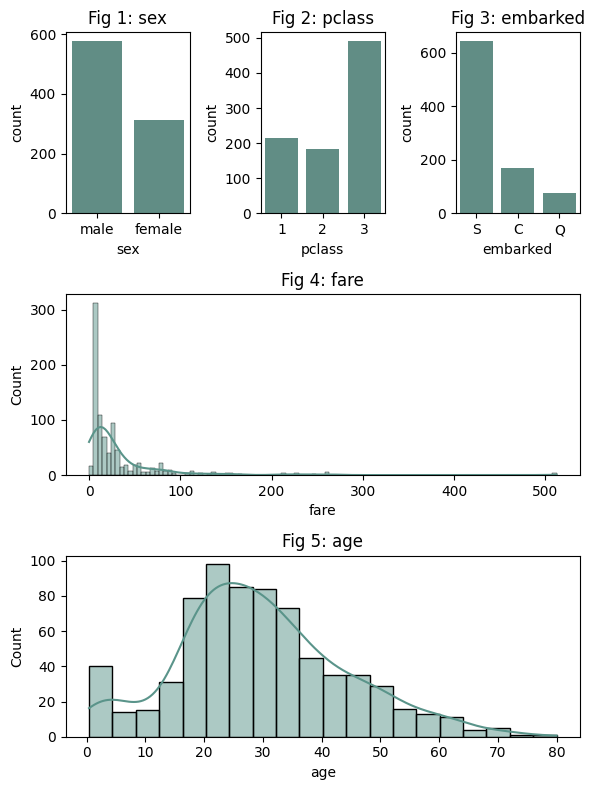

In [18]:
plt.figure(figsize=(6, 8))

for i, col in enumerate(['sex', 'pclass', 'embarked'], start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_train, x=col, color="#5A948A")
    plt.title(f'Fig {i}: {col}')

for i, col in enumerate(['fare', 'age'], start=2):
    plt.subplot(3, 1, i)
    sns.histplot(data=df_train, x=col, kde=True, color="#5A948A")
    plt.title(f'Fig {2+i}: {col}')

plt.tight_layout()

In [19]:
# idosos idade > 65
df_train.query("age > 65")['age'].value_counts().sum()/ df_train.shape[0]*100

0.8978675645342313

**Análise da Distribuição dos Passageiros**

- A proporção de passageiros por gênero foi de 64,76% para o sexo masculino e 35,24% para o feminino.
- Grande parte dos passageiro tem entre 15 e 40 anos
- A taxa de idosos (>65) corresponde a menos de 1% dos passageiros
- O porto mais utilizado para embarque foi de Southampton
- Entre os 891 valores de ticket, 681 são únicos, que corresponde a 23,6% de ticket duplicados
- Em relação às tarifas 75% dos passageiros pagaram até 31. Com mediana de 14,45 e valor máximo pago de 512


**Proposta:**

- Criar faixa etária de idade
- Criar faixa tarifária
- Remover `tickets` devido alto número de duplicados

### *3.2 Taxa de Sobrevivência*

In [20]:
# sobreviventes por sexo
df_train.groupby(['sex'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
sex,
female,74.203822
male,18.890815


In [21]:
# sobreviventes por class
df_train.groupby(['pclass'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
pclass,
1,62.962963
2,47.282609
3,24.236253


In [22]:
# sobreviventes por sibsp
df_train.groupby(['sibsp'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
sibsp,
1,53.588517
2,46.428571
0,34.539474
3,25.000000
4,16.666667
5,0.000000
8,0.000000


In [23]:
# sobreviventes por parch
df_train.groupby(['parch'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
parch,
3,60.000000
1,55.084746
2,50.000000
0,34.365782
5,20.000000
4,0.000000
6,0.000000


In [24]:
# sobreviventes por embark
df_train.groupby(['embarked'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
embarked,
C,55.357143
Q,38.961039
S,33.695652


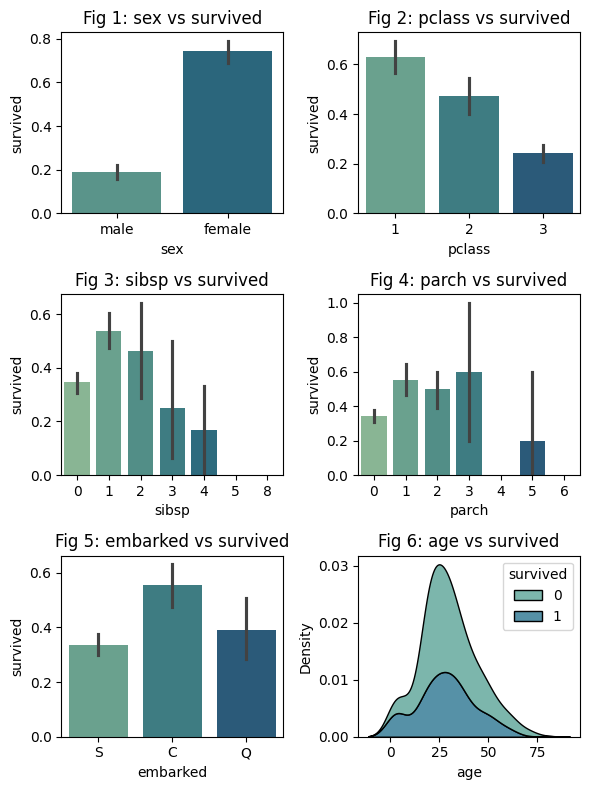

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(6, 8))
axes = axes.flatten()

for i, col in enumerate(['sex', 'pclass', 'sibsp', 'parch', 'embarked']):
    sns.barplot(x=col, y='survived', data=df_train, palette='crest', ax=axes[i])
    axes[i].set_title(f'Fig {1+i}: {col} vs survived')

sns.kdeplot( data=df_train, x="age", hue="survived",  multiple="stack", palette="crest")
plt.title('Fig 6: age vs survived')

plt.tight_layout()
plt.show()

**Taxa de sobrevivência:**

- `sex` - Alta correlação com sobrevivência (74,2%) para o sexo feminino e (18,9%) para homens.
- `pclass` - A classe 1 teve maior taxa de sobrevivência. Já a classe 3, apesar de conter maior número de passageiros, a maioria não sobreviveu.
- `sibsp` , `parch` - Possui correlação com sobrevivência iguais a zero para determinado valores, por isso, será agrupado por faixa para melhor análise.
- `embark` - As pessoas que embarcaram em Cherbourg (C) tiveram maior taxa de sobrevivência.

**Proposta:**

- Inserir `sex` e `pclass` no modelo de aprendizagem
- Criar agrupamento "família" para `sibsp` e `parch`


In [26]:
# sobreviventes por classe e sexo
df_train.groupby(['sex', 'pclass'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

survived
sex    pclass           
female 1       96.808511
       2       92.105263
       3       50.000000
male   1       36.885246
       2       15.740741
       3       13.544669

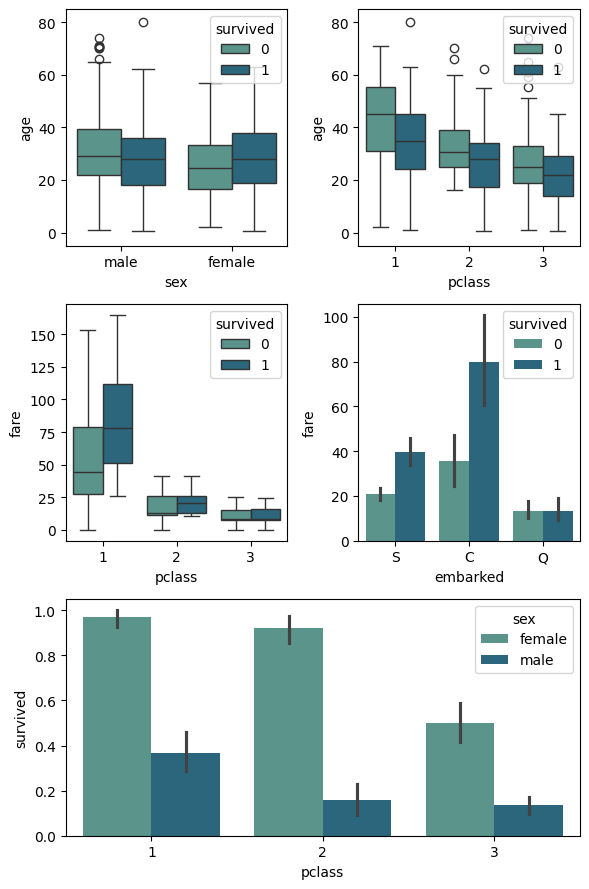

In [27]:
plt.figure(figsize=(6, 9))

for i, col in enumerate(['sex', 'pclass'], start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_train, x=col, y='age', hue='survived', palette="crest")
    plt.ylim(-5, 85)

plt.subplot(323)
sns.boxplot(data=df_train, x='pclass', y='fare', hue='survived', palette="crest", showfliers=False)

plt.subplot(324)
sns.barplot(data=df_train, x='embarked', y='fare', hue='survived', palette="crest")

plt.subplot(313)
sns.barplot(data=df_train, x='pclass', y='survived', hue='sex', palette="crest")

plt.tight_layout()

**Taxa de sobrevivência:**

- `fare` - Os passageiros que pagaram uma tarifa mais alta tiveram uma chance maior de sobreviver.
- `embarked` - Cherbourg (C) apresentou maior taxa de sobrevivência para os passageiros que pagaram as tarifas mais altas. Cherbourg teve também a maior taxa de sobrevivência entre os portos, confirmando a correlação entre tarifa e sobrevivência.

- `passengerid` - Dados desnecessários para análise, porque o ID do passageiro não tem influência na sobrevivência.

**Proposta:**

- Criar faixas tarifárias
- Remover `passengerid`

## **4. Engenharia de Recursos**

### *4.1 Preencher Dados Ausentes*

- Preencher idades ausentes com `idade mediana` de acordo com valores semelhantes de `sex` e `pclass`

In [28]:
# idade mediana de acordo com sex e pclass
df_train.groupby(['sex', 'pclass'])['age'].median().to_frame()

age
sex    pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [29]:
# torna a coluna sex binária
for dataframe in df_combined:
    dataframe['sex'] = dataframe['sex'].replace({'male': 0, 'female': 1}).astype(int)

In [30]:
for dataframe in df_combined:

    # loop externo irá iterar sobre sex
    for i in range(0, 2):

        # loop interno iterar sobre pclass
        for j in range(1, 4):

            # remover nulos
            age_no_null = dataframe[(dataframe['sex'] == i) & \
                                  (dataframe['pclass'] == j)]['age'].dropna()
            # mediana
            age_median = age_no_null.median()

            # localizar dados nulos e substituir por mediana correspondente
            dataframe.loc[ (dataframe['age'].isnull()) & (dataframe['sex'] == i) & (dataframe['pclass'] == j),\
            'age'] = age_median

# tornar coluna para números inteiros
df_train['age'] = df_train['age'].astype(int)
df_test['age'] = df_test['age'].astype(int)

df_combined = [df_train, df_test]

- Por `embarked`apresentar apenas 2 dados ausentes, será preenchido com o local de embarque que mais se repete.

In [31]:
df_train['embarked'].isnull().sum()

2

In [32]:
# localizar dados nulos e substituir por moda de 'embarked'
df_train.loc[ df_train['embarked'].isnull(),'embarked'] = df_train['embarked'].mode()[0]

- No conjunto de dados para teste existe 1 dado ausente de `fare` que será preenchido com a mediana.

In [33]:
# dados nulos ou ausentes (%) no df teste
df_test.isnull().sum()/df_train.shape[0]*100

passengerid     0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.112233
cabin          36.700337
embarked        0.000000
dtype: float64

In [34]:
df_test['fare'].isnull().sum()

1

In [35]:
df_test['fare'].fillna(df_test['fare'].dropna().median(), inplace=True)

### *4.2 Extrair e Agrupar Título*


Vamos analisar se o título presente no nome do passageiro tem alguma correlação com a sobrevivência.

In [36]:
df_combined = [df_train, df_test]

for dataframe in df_combined:

    # extrair título do nome
    dataframe['title'] = dataframe['name'].apply(lambda x: x.split(', ')[1].split('.')[0])

df_train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
df_train['title'].value_counts().to_frame('')

,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2
the Countess,1


In [38]:
for dataframe in df_combined:

    # agrupar títulos raros
    dataframe['title'] = dataframe['title'].apply(lambda x: 'Raro' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

# sobreviventes por títulos
df_train.groupby(['title'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
title,
Mrs,79.200000
Miss,69.780220
Master,57.500000
Raro,44.444444
Mr,15.667311


### *4.3 Agrupar Tarifa*



Passageiros que pagaram tarifas mais altas tiveram maior taxa de sobrevivência. Para entender melhor essa relação, vamos criar um conjunto de faixas tarifárias que nos permitirá analisar os dados de forma mais segmentada.

In [39]:
# criar faixas tarifárias
df_train['fare_range'] = pd.qcut(df_train['fare'], 4)

# sobrevivência por faixas tarifárias
df_train.groupby(['fare_range'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
fare_range,
"(31.0, 512.329]",58.108108
"(14.454, 31.0]",45.495495
"(7.91, 14.454]",30.357143
"(-0.001, 7.91]",19.730942


### *4.4 Agrupar Idades*

Para analisar a influência da idade na taxa de sobrevivência, será realizado um agrupamento dos dados `age` em faixas etárias.

In [40]:
# agrupar faixa de idade
df_train['age_group'] = pd.cut(df_train['age'], 5)

# sobrevivência por faixa de idade
df_train.groupby(['age_group'])[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
age_group,
"(-0.08, 16.0]",55.000000
"(48.0, 64.0]",43.478261
"(32.0, 48.0]",41.203704
"(16.0, 32.0]",33.737374
"(64.0, 80.0]",9.090909


### *4.5 Família*

Criar conjunto "Família” baseada em `parch` e `sibsp` para obter o número total de membros da família a bordo.

In [41]:
for dataframe in df_combined:

    # agrupar membros da mesma família
    dataframe['familysize'] = dataframe['sibsp'] + dataframe['parch'] + 1

In [42]:
df_train['familysize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familysize, dtype: int64

In [43]:
# sobrevivência por tamanho da família
df_train.groupby(['familysize'])[['survived']].mean().sort_values(by='survived', ascending=False)

,survived
familysize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [44]:
for dataframe in df_combined:

    labelfamilysize = ['solo', 'pequena', 'media', 'grande']

    # agrupar familysize por faixa de membros familiar
    dataframe['familygroup'] = pd.cut(dataframe['familysize'], bins=[0,1,4,6,dataframe['familysize'].max()], labels=labelfamilysize)

# sobrevivência por grupo familiar
df_train.groupby('familygroup')[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
familygroup,
pequena,57.876712
solo,30.353818
media,16.216216
grande,16.000000


### *4.6 Sozinhos*

Pode ser interessante criar um conjunto "Sozinho" baseado nos passageiros que estava a bordo sem a companhia de um familiar.

- sozinho = 1
- com familiar = 0

In [45]:
for dataframe in df_combined:

    # criar coluna de passageiros que estavam sozinhos
    dataframe['alone'] = dataframe['familygroup'].apply(lambda x: 1 if x == 'solo' else 0)

# sobrevivência dos sozinhos
df_train.groupby('alone')[['survived']].mean().sort_values(by='survived', ascending=False)*100

,survived
alone,
0,50.564972
1,30.353818


## **5. Preparando Modelo**

In [46]:
# converter strings em valores numéricos é exigido pela maioria dos algoritmos de modelo.
for dataframe in df_combined:
    dataframe['embarked'] = dataframe['embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    dataframe['title'] = dataframe['title'].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Raro": 5}).astype(int)
    dataframe['familygroup'] = dataframe['familygroup'].replace({"pequena": 0, "solo": 1, "media": 2, "grande": 3}).astype(int)

In [47]:
# criar faixa etária de idade
for dataframe in df_combined:

    dataframe.loc[ dataframe['age'] <= 16, 'age'] = 0
    dataframe.loc[(dataframe['age'] > 16) & (df_train['age'] <= 32), 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (df_train['age'] <= 48), 'age']   = 2
    dataframe.loc[(dataframe['age'] > 48) & (df_train['age'] <= 64), 'age']   = 3
    dataframe.loc[ dataframe['age'] > 64, 'age'] = 4

In [48]:
# criar faixa tarifária
for dataframe in df_combined:
    dataframe.loc[ dataframe['fare'] <= 7.91, 'fare'] = 0
    dataframe.loc[(dataframe['fare'] > 7.91) & (dataframe['fare'] <= 14.454), 'fare'] = 1
    dataframe.loc[(dataframe['fare'] > 14.454) & (dataframe['fare'] <= 31), 'fare']   = 2
    dataframe.loc[ dataframe['fare'] > 31, 'fare'] = 3

    dataframe['fare'] = dataframe['fare'].astype(int)

In [49]:
# excluir colunas desnecessárias
df_train = df_train.drop(['passengerid', 'name', 'sibsp', 'parch', 'ticket', 'cabin', 'fare_range', 'age_group', 'familysize'], axis=1)
df_test = df_test.drop(['name', 'sibsp', 'parch', 'ticket', 'cabin', 'familysize'], axis=1)

In [50]:
df_train.sample(5)

,survived,pclass,sex,age,fare,embarked,title,familygroup,alone
782,0,1,0,1,2,0,1,1,1
885,0,3,1,2,2,2,3,2,0
689,1,1,1,0,3,0,2,0,0
574,0,3,0,0,1,0,1,1,1
144,0,2,0,1,1,0,1,1,1


In [51]:
df_test.sample(5)

,passengerid,pclass,sex,age,fare,embarked,title,familygroup,alone
58,950,3,0,1,2,0,1,0,0
400,1292,1,1,1,3,0,2,1,1
108,1000,3,0,1,1,0,1,1,1
72,964,3,1,1,1,0,2,1,1
103,995,3,0,1,0,0,1,1,1


## **6. Treinamento de Modelo**

***Random Forest***

Construiremos o que é conhecido como modelo de **floresta aleatória** . Este modelo é construído a partir de várias “árvores” (há três árvores na imagem abaixo, mas construiremos 100!) que irão considerar individualmente os dados de cada passageiro e votar se o indivíduo sobreviveu. Então, o modelo de floresta aleatória toma uma decisão democrática: o resultado com mais votos vence!

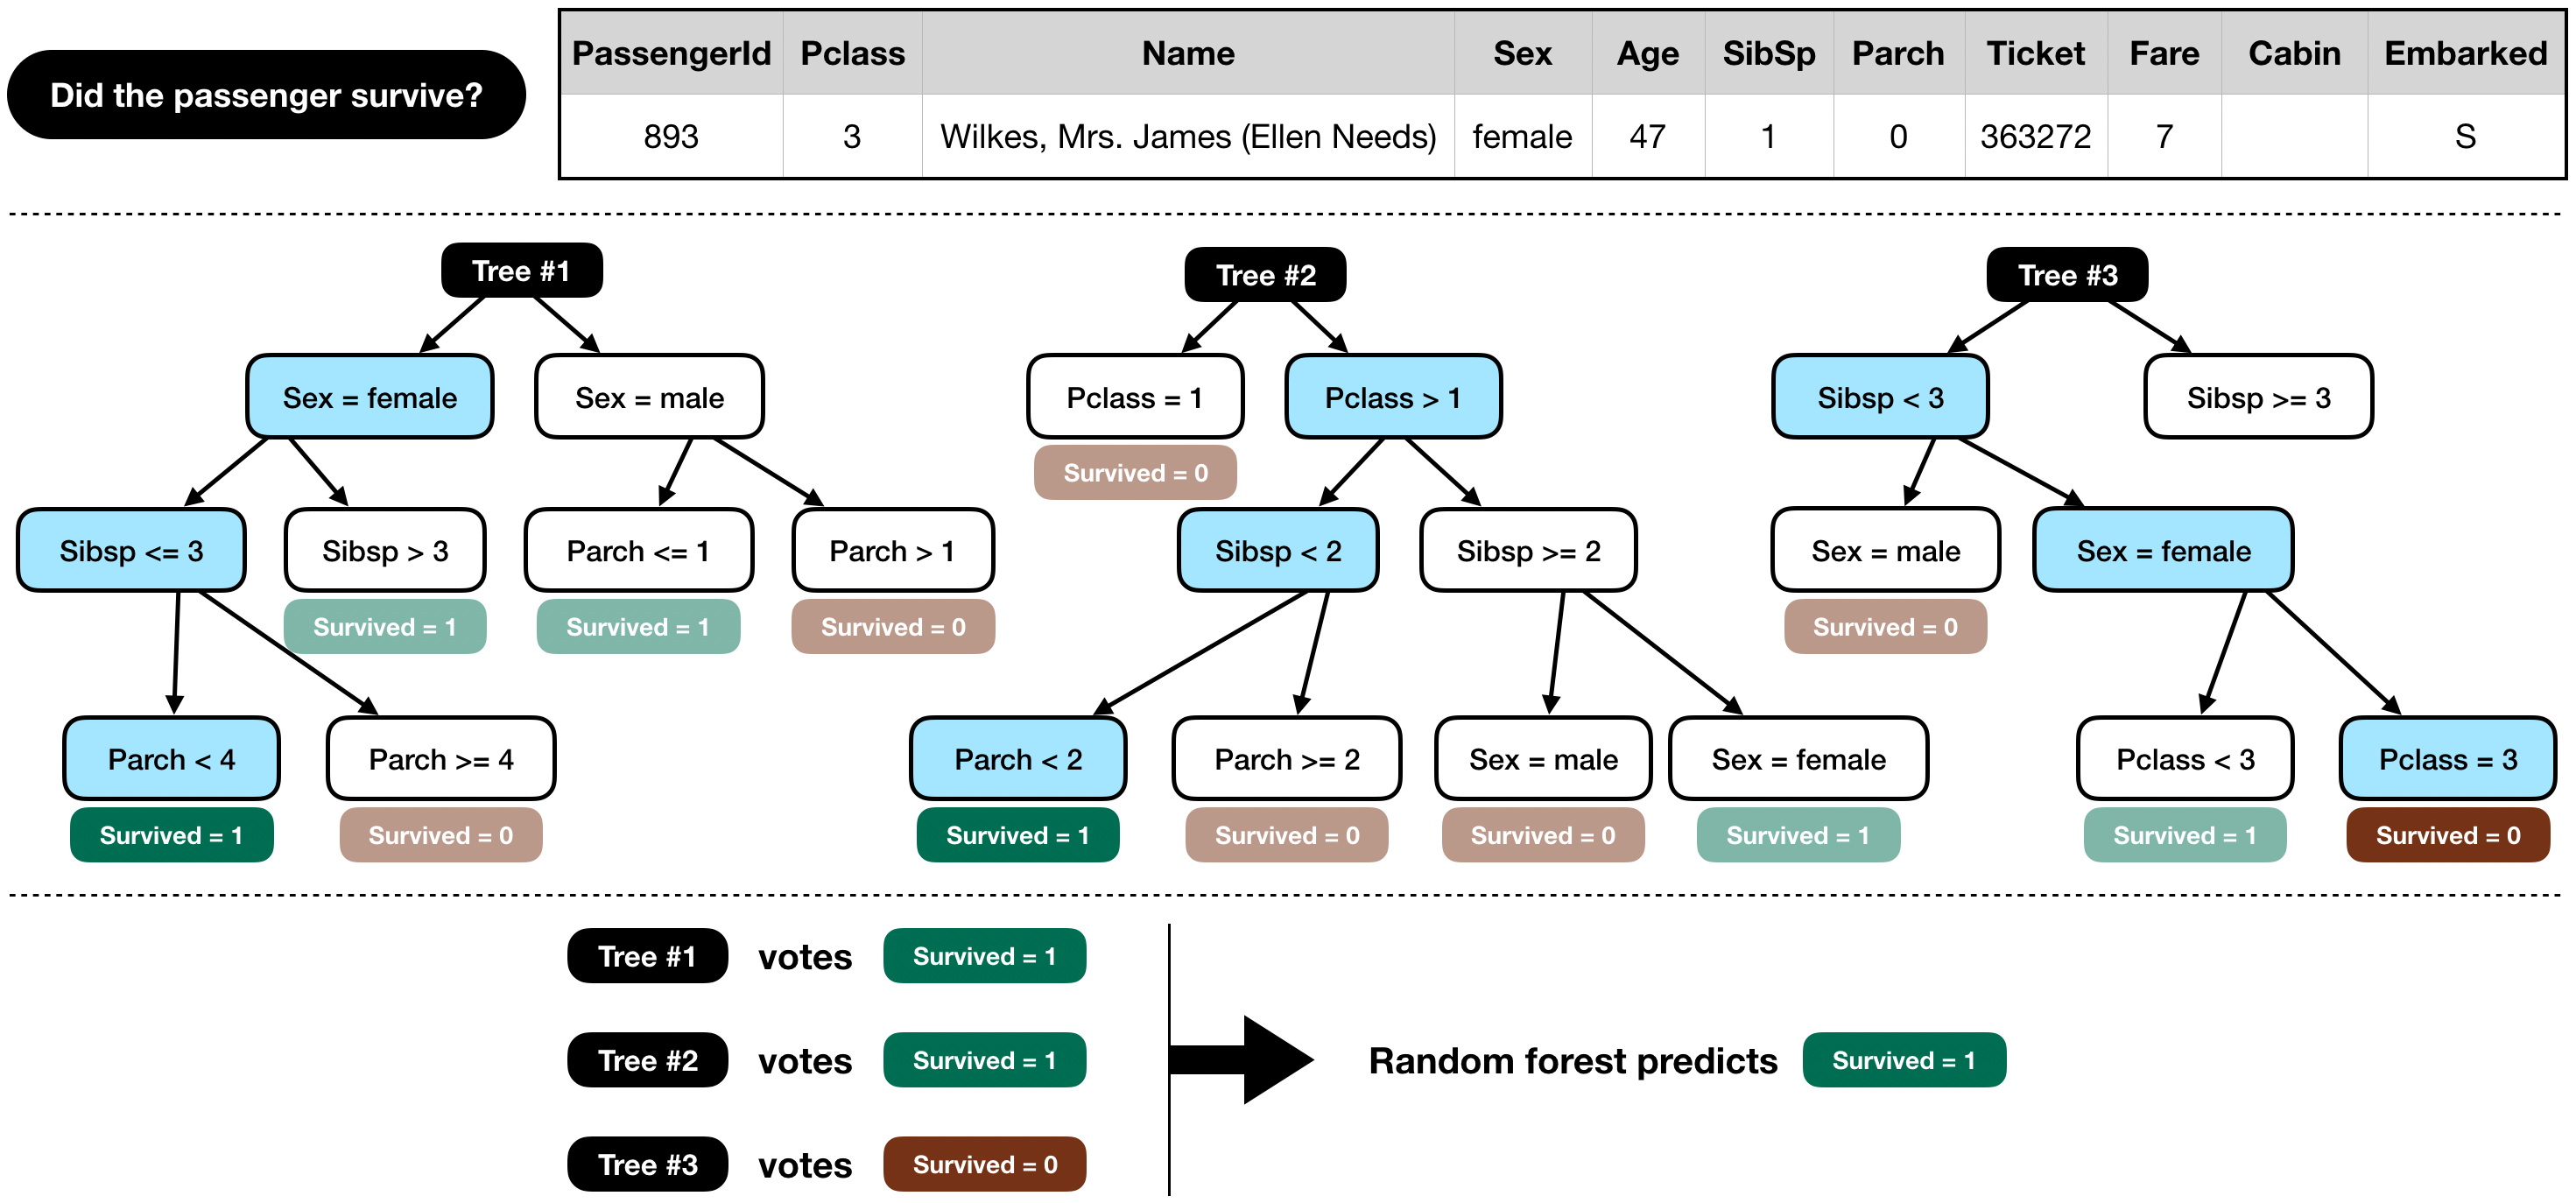

In [52]:
# importando bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

In [53]:
# dados para treino
X_train = df_train.drop("survived", axis=1)

# variável alvo
Y_train = df_train["survived"]

# dados para teste
X_test  = df_test.drop("passengerid", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [54]:
# criar uma instância do modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# treinar o modelo
model = model.fit(X_train, Y_train)

# fazer previsão com o modelo treinado
predict_survivedRF = model.predict(X_test)

# avaliar o desempenho do modelo nos dados de treinamento
acc_random_forest = round(model.score(X_train, Y_train) * 100, 2)

print(f'Accuracy {acc_random_forest}')

Accuracy 87.43


In [55]:
submission = pd.DataFrame({
        "passengerId": df_test["passengerid"],
        "survived": predict_survivedRF
    })

In [56]:
submission

,passengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission.to_csv('submission.csv', index=False)

Referências utilizadas na elaboração deste notebook:

- [Titanic Tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)
- [Titanic - Лебедева Дарья (гр. РИМ-130907) ДЗ по МО](https://www.kaggle.com/code/dashleb/titanic-130907/notebook)
- [Titanic EDA & Survival Prediction](https://www.kaggle.com/code/duongtruongbinh/titanic-eda-survival-prediction)